# <center>VISUALIZING FEATURES PCA vs T-SNE</center>

In [1]:
from sklearn.datasets import load_iris, load_digits, load_wine, load_breast_cancer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

## Load sklearn classification dataset

In [2]:
iris = load_iris()
digits = load_digits()
wine = load_wine()
breast = load_breast_cancer()

## Set some parameters

In [3]:
# t-sne random seed
n_random = 42
c_size = 20
plt.style.use('fivethirtyeight')

## PCA Decomposition

In [4]:
x_iris = PCA(n_components=2).fit_transform(iris.data)
x_digits = PCA(n_components=2).fit_transform(digits.data)
x_wine = PCA(n_components=2).fit_transform(wine.data)
x_breast = PCA(n_components=2).fit_transform(breast.data)

Text(0.5, 1.0, 'BREAST CANCER')

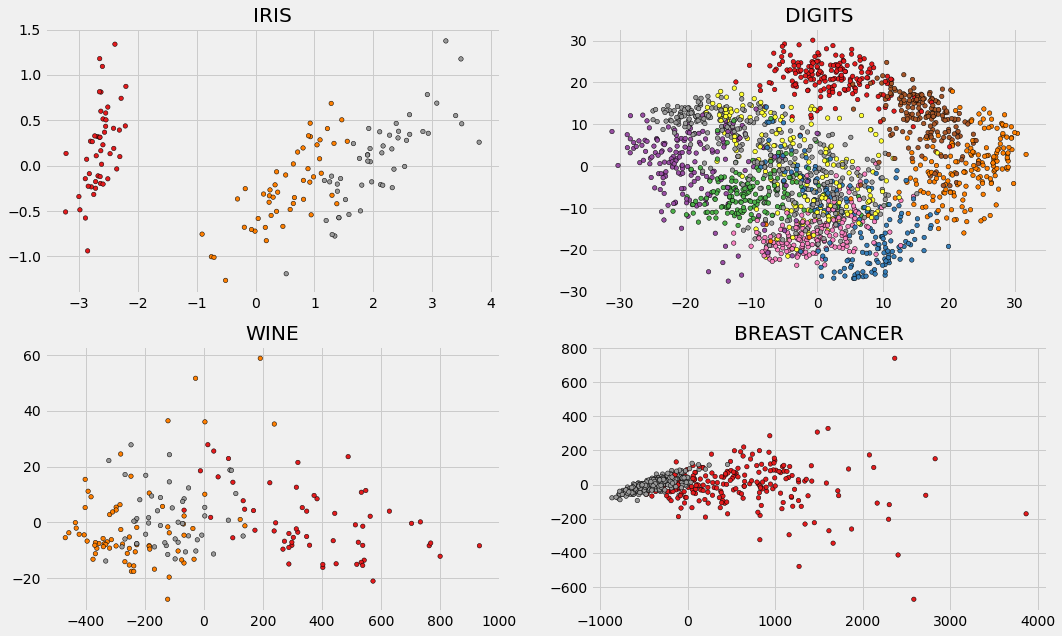

In [5]:
fig, ax = plt.subplots(2,2, figsize=(16,10))

ax[0,0].scatter(x_iris[:,0], x_iris[:,1], c=iris.target, cmap=plt.cm.Set1, edgecolor='k', s=c_size)
ax[0,0].set_title('IRIS')

ax[0,1].scatter(x_digits[:,0], x_digits[:,1], c=digits.target, cmap=plt.cm.Set1, edgecolor='k', s=c_size)
ax[0,1].set_title('DIGITS')

ax[1,0].scatter(x_wine[:,0], x_wine[:,1], c=wine.target, cmap=plt.cm.Set1, edgecolor='k', s=c_size)
ax[1,0].set_title('WINE')

ax[1,1].scatter(x_breast[:,0], x_breast[:,1], c=breast.target, cmap=plt.cm.Set1, edgecolor='k', s=c_size)
ax[1,1].set_title('BREAST CANCER')

## T-SNE

In [6]:
x_iris = TSNE(n_components=2, random_state=n_random).fit_transform(iris.data)
x_digits = TSNE(n_components=2, random_state=n_random).fit_transform(digits.data)
x_wine = TSNE(n_components=2, random_state=n_random).fit_transform(wine.data)
x_breast = TSNE(n_components=2, random_state=n_random).fit_transform(breast.data)

Text(0.5, 1.0, 'BREAST CANCER')

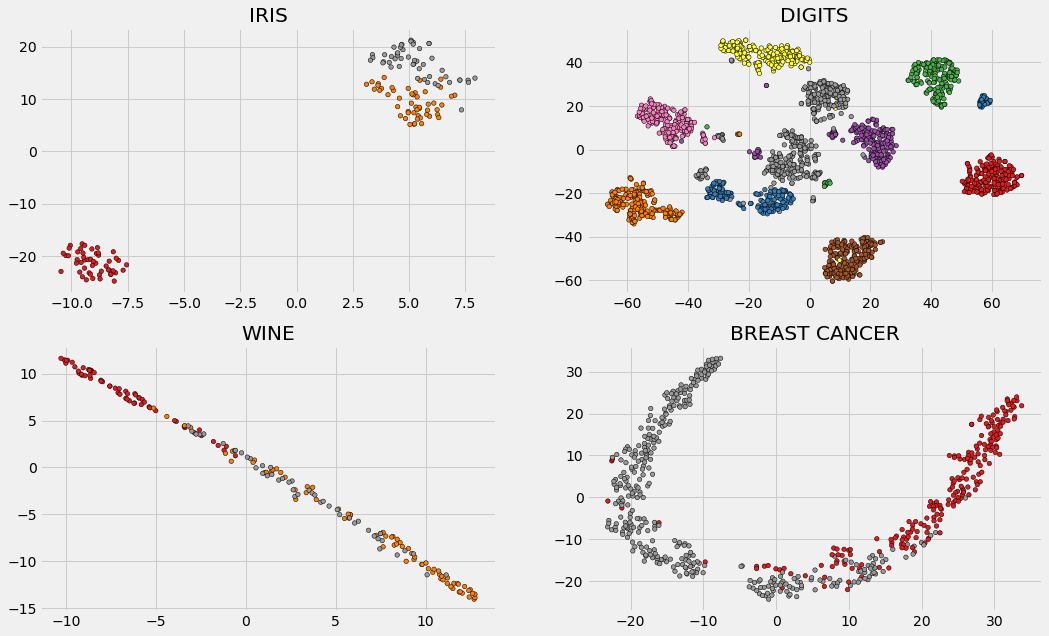

In [7]:
fig, ax = plt.subplots(2,2, figsize=(16,10))

ax[0,0].scatter(x_iris[:,0], x_iris[:,1], c=iris.target, cmap=plt.cm.Set1, edgecolor='k', s=c_size)
ax[0,0].set_title('IRIS')

ax[0,1].scatter(x_digits[:,0], x_digits[:,1], c=digits.target, cmap=plt.cm.Set1, edgecolor='k', s=c_size)
ax[0,1].set_title('DIGITS')

ax[1,0].scatter(x_wine[:,0], x_wine[:,1], c=wine.target, cmap=plt.cm.Set1, edgecolor='k', s=c_size)
ax[1,0].set_title('WINE')

ax[1,1].scatter(x_breast[:,0], x_breast[:,1], c=breast.target, cmap=plt.cm.Set1, edgecolor='k', s=c_size)
ax[1,1].set_title('BREAST CANCER')

## Huge dataset from Keras

In [8]:
import keras
import numpy as np

Using TensorFlow backend.


## Load fashion-MNIST dataset

In [9]:
fashion_mnist = keras.datasets.fashion_mnist

In [10]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Split dataset

Due to the size of the dataset (both testing and training), we only use 100 instances from each class. Training and testing doesn't matter here.

In [11]:
train = np.hstack((train_images.reshape(train_images.shape[0],train_images.shape[1]*train_images.shape[2]),train_labels.reshape(-1,1)))
test = np.hstack((test_images.reshape(test_images.shape[0],test_images.shape[1]*test_images.shape[2]),test_labels.reshape(-1,1)))

In [12]:
dt_train = np.zeros((1,785))
dt_test =  np.zeros((1,785))

In [13]:
for i in range (10):
    for j in range (100):
        temp = train[train[:,-1]==i][j]
        dt_train = np.vstack((dt_train,temp))

for i in range (10):
    for j in range (100):
        temp = test[test[:,-1]==i][j]
        dt_test = np.vstack((dt_test,temp))

## PCA

In [14]:
x_train = PCA(n_components=2).fit_transform(dt_train[1:,:-1])
x_test = PCA(n_components=2).fit_transform(dt_test[1:,:-1])

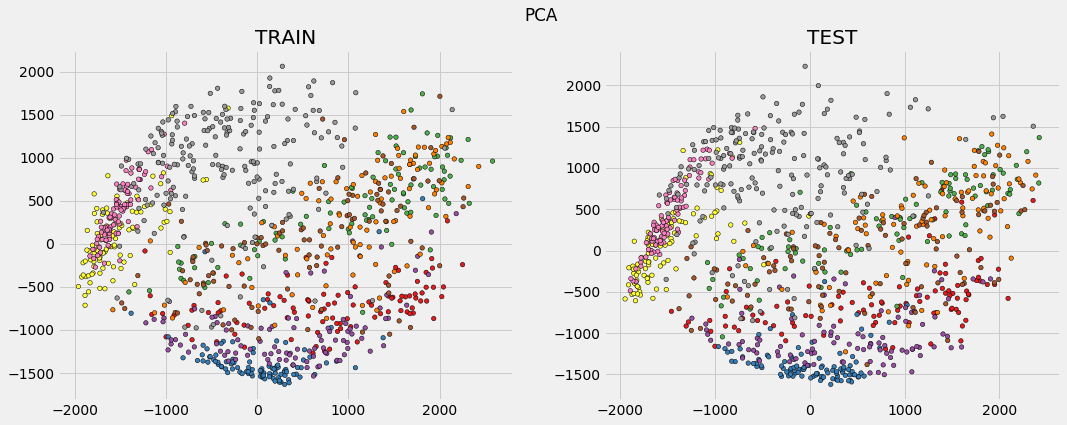

In [15]:
fig, ax = plt.subplots(1,2, figsize=(16,6))

fig.suptitle('PCA')

ax[0].scatter(x_train[:,0], x_train[:,1], c=dt_train[1:,-1].astype(int), cmap=plt.cm.Set1, edgecolor='k', s=c_size)
ax[0].set_title('TRAIN')

ax[1].scatter(x_test[:,0], x_test[:,1], c=dt_test[1:,-1].astype(int), cmap=plt.cm.Set1, edgecolor='k', s=c_size)
ax[1].set_title('TEST')

plt.show()

## T-SNE

In [16]:
x_train = TSNE(n_components=2, random_state=n_random).fit_transform(dt_train[1:,:-1])
x_test = TSNE(n_components=2, random_state=n_random).fit_transform(dt_test[1:,:-1])

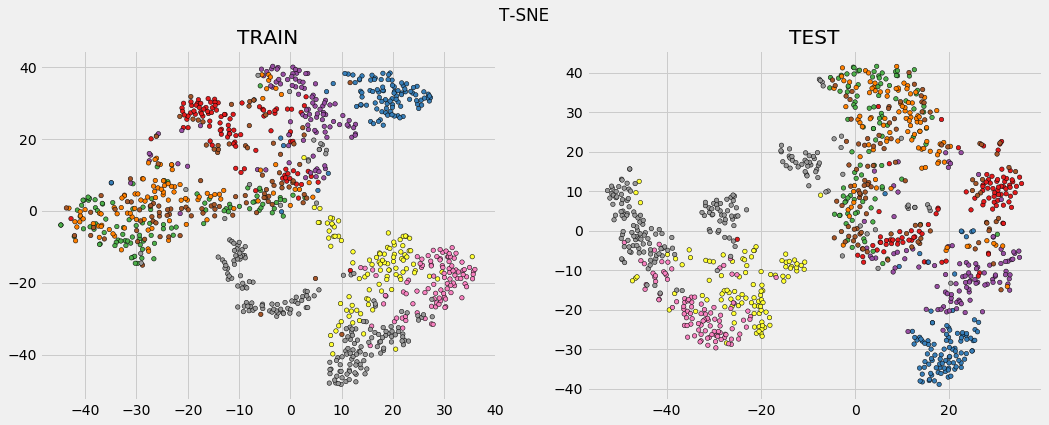

In [17]:
fig, ax = plt.subplots(1,2, figsize=(16,6))

fig.suptitle('T-SNE')

ax[0].scatter(x_train[:,0], x_train[:,1], c=dt_train[1:,-1].astype(int), cmap=plt.cm.Set1, edgecolor='k', s=c_size)
ax[0].set_title('TRAIN')

ax[1].scatter(x_test[:,0], x_test[:,1], c=dt_test[1:,-1].astype(int), cmap=plt.cm.Set1, edgecolor='k', s=c_size)
ax[1].set_title('TEST')

plt.show()